# Introduction to Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

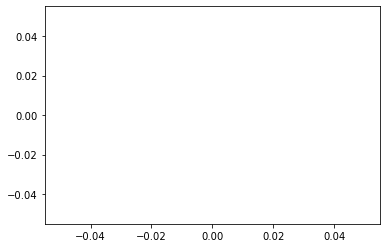

In [2]:
# Note the use of the semicolon
plt.plot();

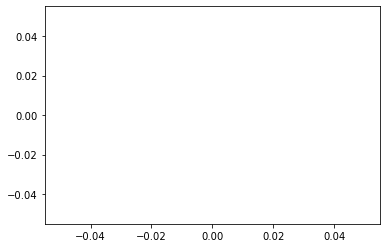

In [3]:
plt.plot()
plt.show()

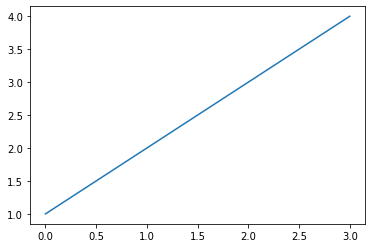

In [4]:
plt.plot([1, 2, 3, 4]);

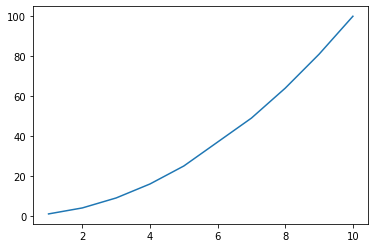

In [5]:
x = [1, 2, 3, 4, 5, 7, 8, 9, 10]
y = [1, 4, 9, 16, 25, 49, 64, 81, 100]
plt.plot(x, y);

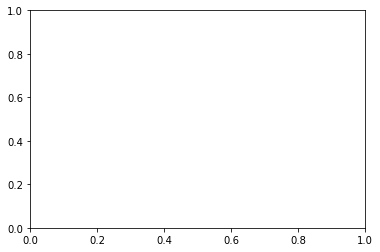

In [6]:
# 1st method
fig = plt.figure() # create figure
ax = fig.add_subplot() # adds some axes
plt.show()

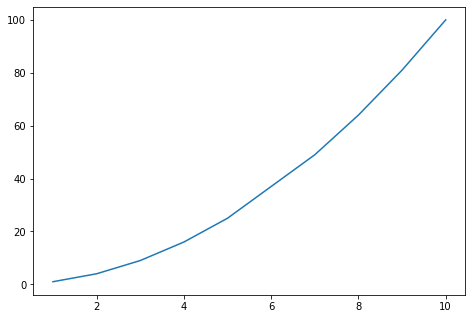

In [7]:
# 2nd method
fig = plt.figure() # create a figure
ax = fig.add_axes ([1, 1, 1, 1]) # add the data from above??
ax.plot(x, y)
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

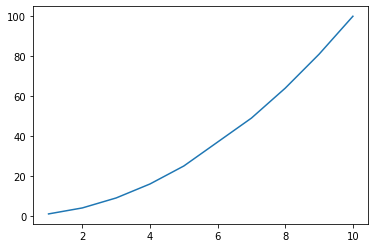

In [8]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x, y); # we're using the x and y's we created from above
type(fig), type(ax)

# Matplotlib example workflow


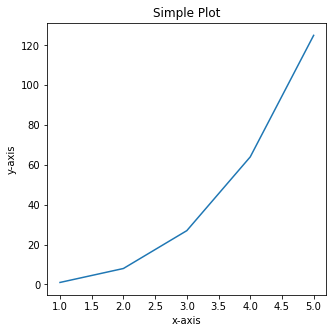

In [9]:
# 1 Prepare Data
x = [1, 2, 3, 4, 5]
y = [1, 8, 27, 64, 125]

# 2 Setup Plot (obj oriented)
fig, ax = plt.subplots(figsize = (5, 5))

# 3 Plot data
ax.plot(x, y)

#4 Customize plot
ax.set(title = "Simple Plot",
      xlabel = "x-axis",
      ylabel = "y-axis")

#5 Save & show ( you save the whole figure)
fig.savefig("/Users/chrisgaughan/Desktop/ml_course_udemy/sample_project_udemy/sample-plot.png")




    

## Making figures with numpy arrays
We want:
* Line Plot
* Scatter plot
* Bar plot
* Histogram
* Subplot

In [10]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

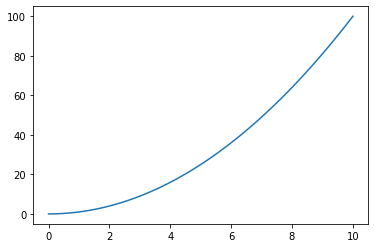

In [11]:
#Plot some data - Lineplot
fig, ax = plt.subplots()
ax.plot(x, x ** 2); # default in matplotlib is a line-plot

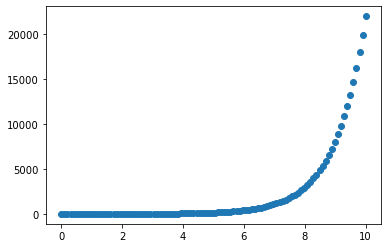

In [12]:
# Use the same data to make  scatterplot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

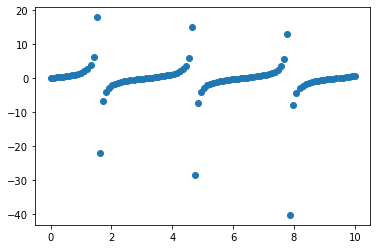

In [13]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.tan(x));

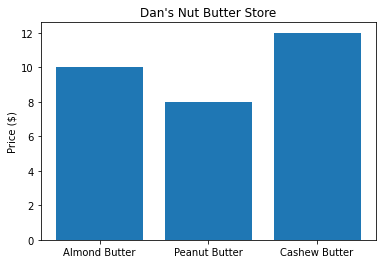

In [14]:
# Create a plot from a dictionary
nut_butter_prices = {"Almond Butter": 10,
                    "Peanut Butter": 8,
                    "Cashew Butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values()) #could include x= and height=
ax.set(title="Dan's Nut Butter Store",
      ylabel = "Price ($)");

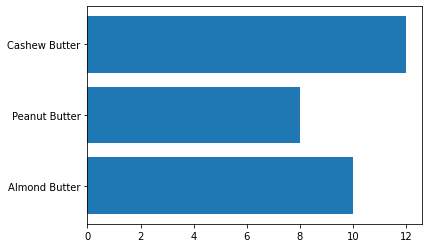

In [15]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));


## Two options for subplots

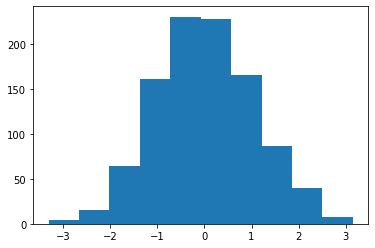

In [16]:
# Histogram
x = np.random.randn(1000) # This many points is put into a guassian distribution
fig, ax = plt.subplots()
ax.hist(x);

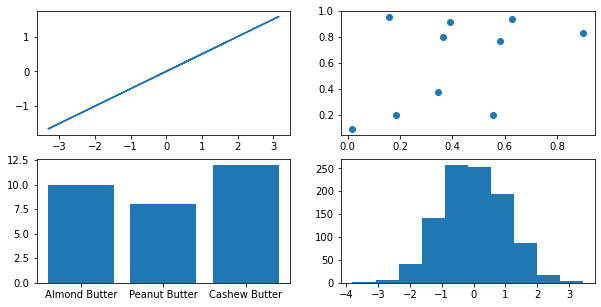

In [17]:
# Two options for subplots
#option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                          ncols=2,
                                          figsize=(10, 5))

#How would we get data onto here?
# Plot to each axis (we already have x-data from above from the histogram example)
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

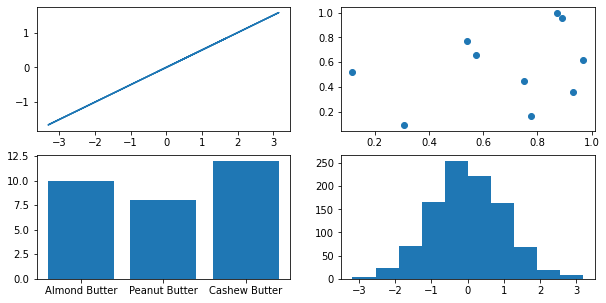

In [18]:
# Subplots option 2
fig, ax = plt.subplots(nrows = 2,
                      ncols = 2,
                      figsize = (10,5))
# Plot to each differrent axis
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

# Plotting from Pandas DataFrames

In [19]:
car_sales = pd.read_csv("car-sales.csv")

In [20]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


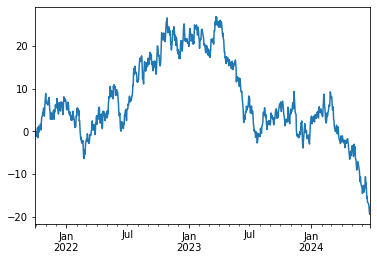

In [21]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("9/30/2021", periods=1000))

ts = ts.cumsum()

ts.plot();


In [22]:
# we'll work with the car-sales data, but the price has to be formatted into an integer
car_sales["Price"]= car_sales["Price"].str.replace('[\$\,\.]', '')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [23]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [24]:
type(car_sales["Price"])

pandas.core.series.Series

In [25]:
type(car_sales["Price"][0]) #So we're working with strings in this column

str

In [26]:
# Notice we need to remove the last two zeros from the price
car_sales['Price'] = car_sales['Price'].str[:-2] # remove the last two zeros
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [27]:
car_sales["Sales Date"]= pd.date_range("9/30/2021", periods=len(car_sales))

In [28]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sales Date
0,Toyota,White,150043,4,4000,2021-09-30
1,Honda,Red,87899,4,5000,2021-10-01
2,Toyota,Blue,32549,3,7000,2021-10-02
3,BMW,Black,11179,5,22000,2021-10-03
4,Nissan,White,213095,4,3500,2021-10-04
5,Toyota,Green,99213,4,4500,2021-10-05
6,Honda,Blue,45698,4,7500,2021-10-06
7,Honda,Blue,54738,4,7000,2021-10-07
8,Toyota,White,60000,4,6250,2021-10-08
9,Nissan,White,31600,4,9700,2021-10-09


In [29]:
car_sales["Total Sales ($)"]= car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sales Date,Total Sales ($)
0,Toyota,White,150043,4,4000,2021-09-30,4000
1,Honda,Red,87899,4,5000,2021-10-01,40005000
2,Toyota,Blue,32549,3,7000,2021-10-02,400050007000
3,BMW,Black,11179,5,22000,2021-10-03,40005000700022000
4,Nissan,White,213095,4,3500,2021-10-04,400050007000220003500
5,Toyota,Green,99213,4,4500,2021-10-05,4000500070002200035004500
6,Honda,Blue,45698,4,7500,2021-10-06,40005000700022000350045007500
7,Honda,Blue,54738,4,7000,2021-10-07,400050007000220003500450075007000
8,Toyota,White,60000,4,6250,2021-10-08,4000500070002200035004500750070006250
9,Nissan,White,31600,4,9700,2021-10-09,40005000700022000350045007500700062509700


## what's happened in the above is that since the prices are in string format, the cumsum has just concatenated the strings together

In [30]:
# Fix it
car_sales["Total Sales ($)"]= car_sales["Price"].astype(int).cumsum()

In [31]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sales Date,Total Sales ($)
0,Toyota,White,150043,4,4000,2021-09-30,4000
1,Honda,Red,87899,4,5000,2021-10-01,9000
2,Toyota,Blue,32549,3,7000,2021-10-02,16000
3,BMW,Black,11179,5,22000,2021-10-03,38000
4,Nissan,White,213095,4,3500,2021-10-04,41500
5,Toyota,Green,99213,4,4500,2021-10-05,46000
6,Honda,Blue,45698,4,7500,2021-10-06,53500
7,Honda,Blue,54738,4,7000,2021-10-07,60500
8,Toyota,White,60000,4,6250,2021-10-08,66750
9,Nissan,White,31600,4,9700,2021-10-09,76450


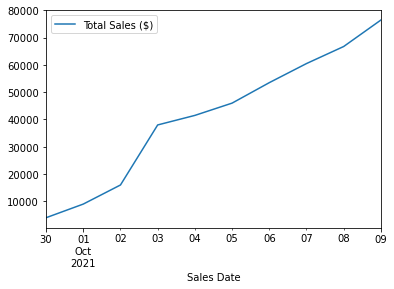

In [32]:
# Let's plot the total sales
car_sales.plot(x ="Sales Date", y = "Total Sales ($)");

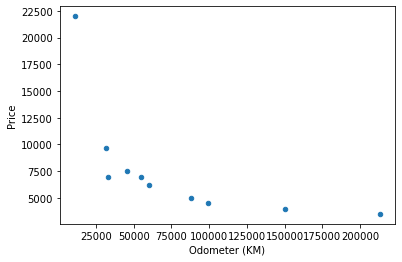

In [33]:
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [34]:
# Let's try on another Data Set
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


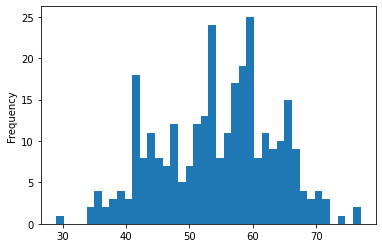

In [35]:
#Create a histogram of age
heart_disease["age"].plot.hist(bins = 40);

In [36]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


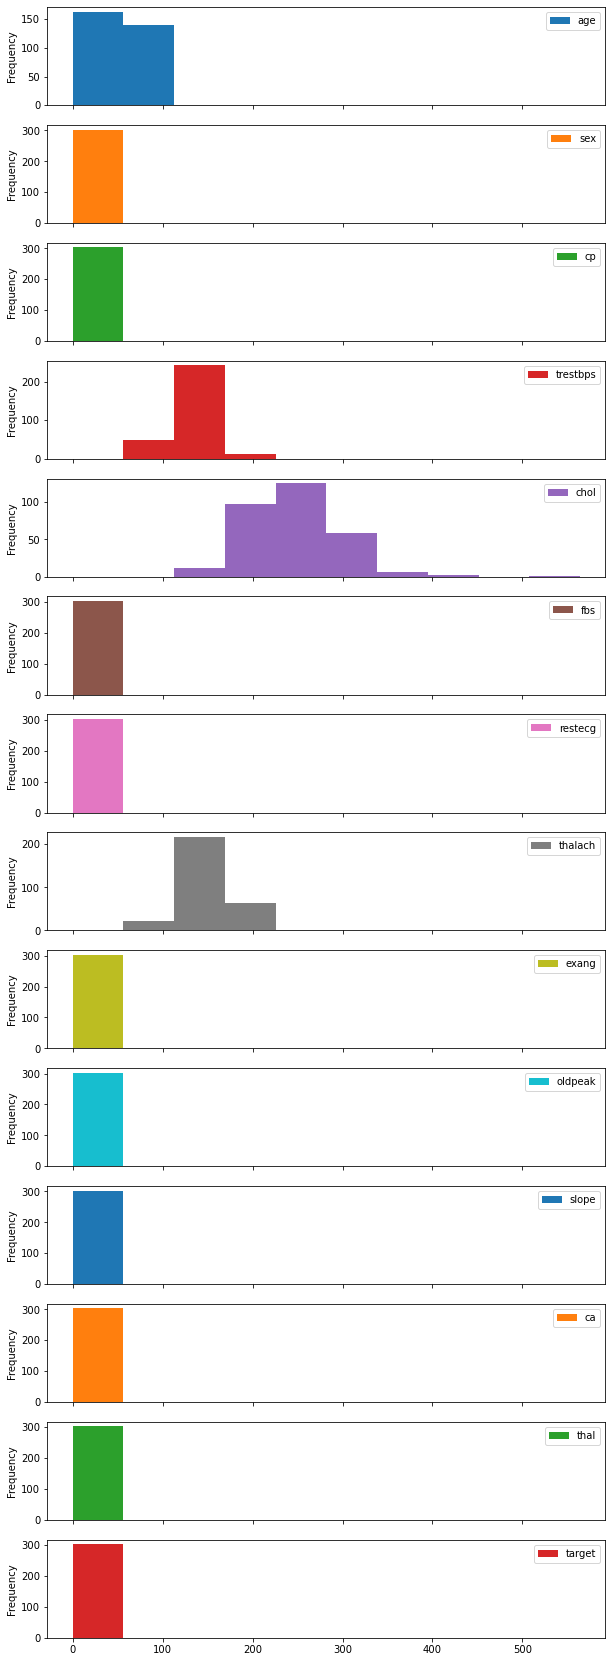

In [37]:
heart_disease.plot.hist(figsize = (10, 30), subplots=True);

<AxesSubplot:>

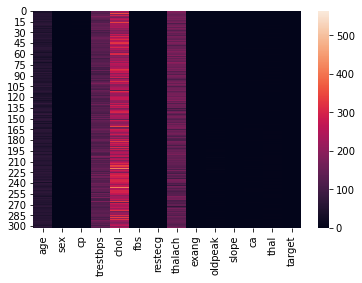

In [38]:
sns.heatmap(heart_disease) #useless

### Which one should you use: pyplot or matplotlib OO method?

* When plotting something quickly, use pyplot method

* plotting something more advanced- ise OO method

In [39]:
over_50 = heart_disease[heart_disease["age"] >50]

In [40]:
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


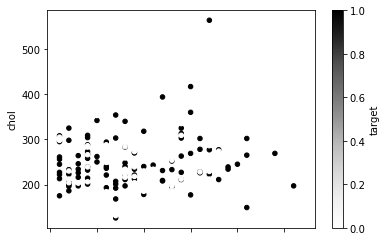

In [41]:
over_50.plot(kind = "scatter",
            x='age',
            y='chol',
             c='target'); # target value of 0 or 1


(45.0, 100.0)

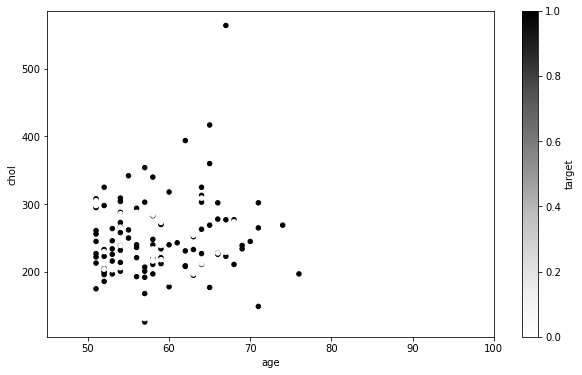

In [42]:
# OO method
fig, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind = 'scatter',
                  x='age',
                  y='chol',
                  c='target',
                  ax=ax);
ax.set_xlim([45, 100])

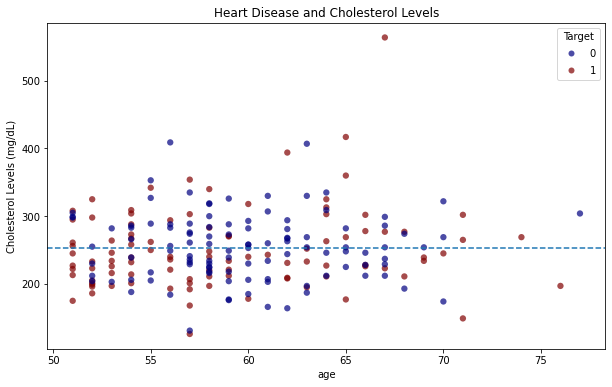

In [43]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax. scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"], cmap=plt.cm.jet,
            s=40, linewidths=0, alpha=0.7);
 # Cutomize the plot
ax.set(title = "Heart Disease and Cholesterol Levels",
          xlabel = "age",
          ylabel = "Cholesterol Levels (mg/dL)");

# Add a Legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal Line

ax.axhline(over_50["chol"].mean(),
          linestyle="--");

In [44]:
ax

<AxesSubplot:title={'center':'Heart Disease and Cholesterol Levels'}, xlabel='age', ylabel='Cholesterol Levels (mg/dL)'>

# Adding Subplots

In [45]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


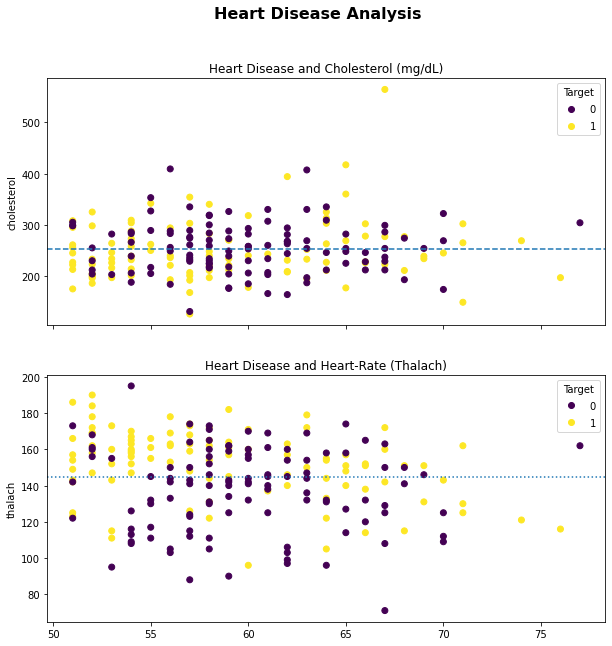

In [46]:
# We're going to create a figure where we have two axes
fig, (ax0, ax1) = plt.subplots(nrows = 2,
                              ncols = 1,
                              figsize=(10, 10),
                              sharex=True)

# add data to ax0
scatter = ax0.scatter(x = over_50["age"],
                     y= over_50["chol"],
                     c = over_50["target"])

# Customize ax0
ax0.set(title = "Heart Disease and Cholesterol (mg/dL)",
       ylabel = "cholesterol");
# add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")
# add a meanline
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");

# Repeat for ax1

# add data to ax1
scatter = ax1.scatter(x = over_50["age"],
                     y= over_50["thalach"],
                     c = over_50["target"])

# Customize ax1
ax1.set(title = "Heart Disease and Heart-Rate (Thalach)",
       ylabel = "thalach");
# add a legend to ax0
ax1.legend(*scatter.legend_elements(), title="Target")
# add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle=":");

# Add a Title to the Entire Figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight = "bold");

# Customizing matplotlib and getting stylish

In [47]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

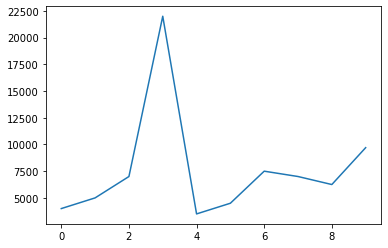

In [48]:
car_sales["Price"].plot();

In [49]:
plt.style.use('seaborn-whitegrid')

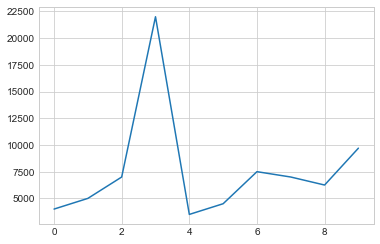

In [50]:
car_sales["Price"].plot(); # nicer

In [51]:
plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'grey'})

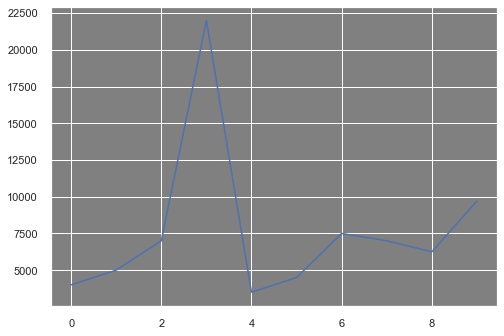

In [52]:
car_sales["Price"].plot();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


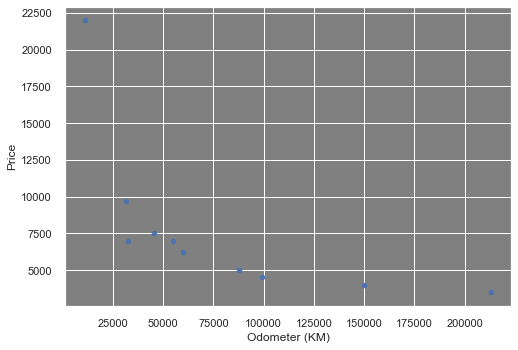

In [53]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");
sns.set_style('whitegrid')

In [54]:
plt.style.use('ggplot')

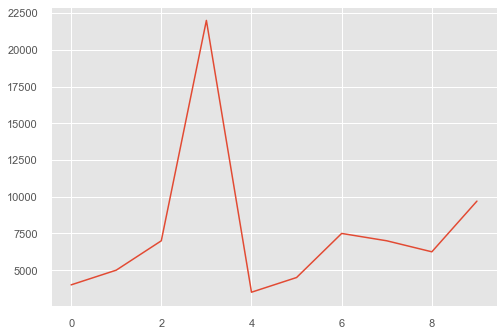

In [55]:
car_sales["Price"].plot();

In [56]:
# Create some data
x = np.random.randn(10, 4)
x

array([[-0.55530628,  0.32695165,  2.39588197,  0.90807198],
       [-0.79567747, -1.42930853, -0.85745466,  0.06214212],
       [-0.17891382,  1.48641618, -1.24070001,  1.53263264],
       [ 1.87931967,  1.20009875, -1.14108549, -1.35142778],
       [ 0.10299246,  0.2711036 , -0.14344093, -1.39963433],
       [-0.78372851,  0.24000807,  0.25078249, -1.25982741],
       [-0.23439232,  1.75397086, -0.22049745, -1.2814179 ],
       [-1.20658518,  1.52102973, -1.36557151, -1.27157048],
       [ 0.34464479,  0.20071847, -1.05893475, -0.46889961],
       [-0.25012808, -1.16270228,  0.08186755, -0.3836343 ]])

In [57]:
df1 = pd.DataFrame(x, columns=['a','b','c','d'])
df1

,a,b,c,d
0,-0.555306,0.326952,2.395882,0.908072
1,-0.795677,-1.429309,-0.857455,0.062142
2,-0.178914,1.486416,-1.240700,1.532633
3,1.879320,1.200099,-1.141085,-1.351428
4,0.102992,0.271104,-0.143441,-1.399634
5,-0.783729,0.240008,0.250782,-1.259827
6,-0.234392,1.753971,-0.220497,-1.281418
7,-1.206585,1.521030,-1.365572,-1.271570
8,0.344645,0.200718,-1.058935,-0.468900
9,-0.250128,-1.162702,0.081868,-0.383634


matplotlib.axes._subplots.AxesSubplot

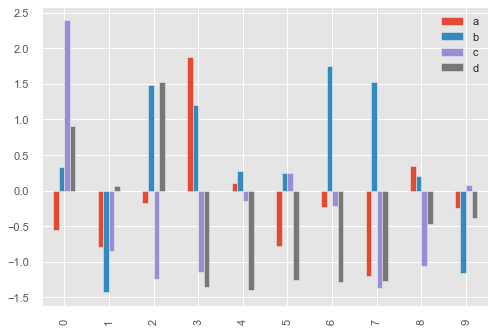

In [58]:
ax = df1.plot(kind ='bar')
type(ax)

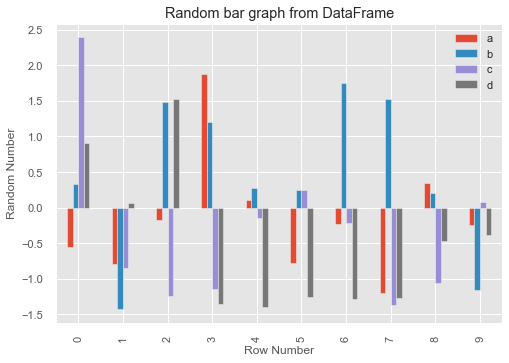

In [59]:
# Customize plot with the 'set-mathod'
ax = df1.plot(kind='bar')

# Add some labels and title
ax.set(title="Random bar graph from DataFrame",
      xlabel='Row Number',
      ylabel="Random Number")
# Make the legend visible
ax.legend().set_visible(True)

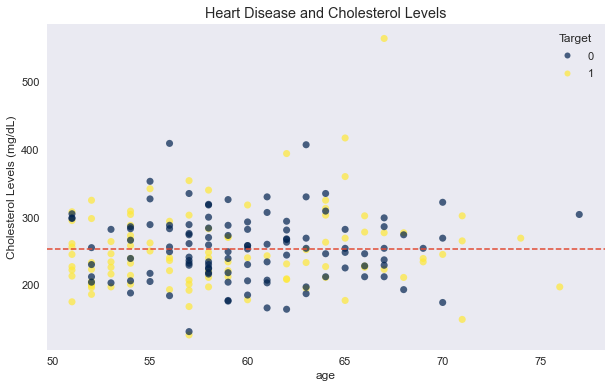

In [60]:
plt.style.use('seaborn-darkgrid')
sns.set_style("dark")
sns.axes_style("darkgrid")

# OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax. scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],cmap="cividis",
            s=50, linewidths=0, alpha=0.7);
 # Cutomize the plot
ax.set(title = "Heart Disease and Cholesterol Levels",
          xlabel = "age",
          ylabel = "Cholesterol Levels (mg/dL)");

# Add a Legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal Line

ax.axhline(over_50["chol"].mean(),
          linestyle="--");

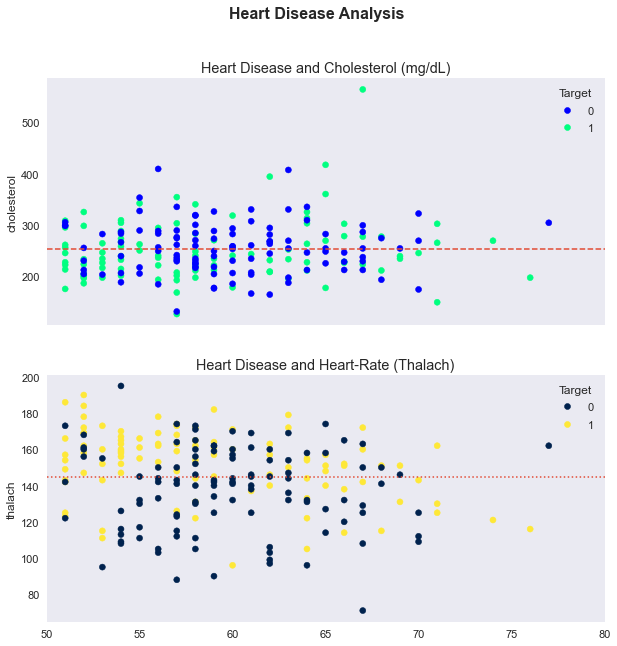

In [61]:
# CUSTOMIZING THE Y AND X AXIS LIMITATIONS

fig, (ax0, ax1) = plt.subplots(nrows = 2,
                              ncols = 1,
                              figsize=(10, 10),
                              sharex=True)

# add data to ax0
scatter = ax0.scatter(x = over_50["age"],
                     y= over_50["chol"],
                     c = over_50["target"],
                     cmap='winter')

# Customize ax0
ax0.set(title = "Heart Disease and Cholesterol (mg/dL)",
       ylabel = "cholesterol");
#change the x-axis limits
ax0.set_xlim([50, 80])
# add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")
# add a meanline
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");

# Repeat for ax1

# add data to ax1
scatter = ax1.scatter(x = over_50["age"],
                     y= over_50["thalach"],
                     c = over_50["target"],
                     cmap = "cividis")

# Customize ax1
ax1.set(title = "Heart Disease and Heart-Rate (Thalach)",
       ylabel = "thalach");
# add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")
# Change the x limit for ax1
ax1.set_xlim([50, 80])
# add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle=":");

# Add a Title to the Entire Figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight = "bold");

# Saving and Sharing Your Plots

#### One thing to do is right-click and save

In [62]:
fig.savefig("Heart-Disease_save-with-code.png")